In [152]:
import librosa 
import librosa.display as dsp
import soundfile as sf
import numpy as np
import scipy
from scipy.fft import fft, fftfreq
import matplotlib.pyplot as plt 
import plotly
import plotly.graph_objs as go
from IPython.display import Audio as audioPlayer

In [200]:
#functions for plotting in time and freq domain
def plotFourierMag(song_mag_data):
    time = np.arange(0,len(song))/sr
    fig, ax = plt.subplots()
    ax.plot(song_frequency,song_mag_data)
    ax.set(xlabel='Time(s)',ylabel='sound amplitude')
    plt.show()
def plotInTime():
    time = np.arange(0,len(song))/sr
    fig, ax = plt.subplots()
    ax.plot(time,song)
    ax.set(xlabel='Time(s)',ylabel='sound amplitude')
    plt.show()
def plotwhatever(y):
    x_axis = np.arange(0,y.size)
    fig, ax = plt.subplots()
    ax.plot(x_axis,y)
    ax.set(xlabel='X',ylabel='Y')
    plt.show()

In [177]:
# song, sr = librosa.load("antonio_vivaldi_4seasons_winter.wav",offset=35.0,duration=20.0)
song, sr = librosa.load("fallout nv_Slow Sax.wav",offset=1.0 ,duration=20.0)
print(song)

[-0.00215158 -0.00309651 -0.00296043 ... -0.01819677 -0.0129218
 -0.00338393]


In [178]:
audioPlayer(data=song, rate=sr, autoplay=False)
# audioPlayer("antonio_vivaldi_4seasons_winter.wav", autoplay=True)

In [179]:
# decompose the signal using rfft
def fourier_function(song):
    complex_fft = scipy.fft.rfft(song)
    magnitude = np.abs(complex_fft)
    phase = np.angle(complex_fft)
    frequency = scipy.fft.rfftfreq(len(song), 1 / sr)
    return magnitude, phase, frequency

song_magnitude, song_phase, song_frequency=fourier_function(song)
print(song_frequency.shape)

(220501,)


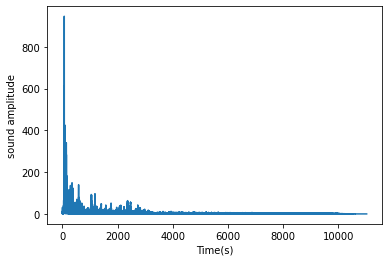

In [187]:
plotFourierMag(song_magnitude)

In [188]:
slider1_ranges= [[200,1500]]
slider2_ranges = [[1500,3500]]

#Take a copy of the magnitude list, then do operations
new_mag = song_magnitude.copy()
def equalizerRange_Window(magnitude,frequency,slider_ranges,slider_dB): 
    #manipulate mag over a specific range
    for rng in slider_ranges:
        # adjust magnitude of range in list      
        target_freq= list(np.where((frequency>rng[0])&(frequency<rng[1]))[0])
        for i in target_freq:
            new_mag[i]=song_magnitude[i]*10**(slider_dB)
        print(rng[0])

In [223]:
#Take a copy of the magnitude list, then do operations
new_mag = song_magnitude.copy()
# function that uses triangle window to manipulate data, still not done
def equalizerRange_Triangle(magnitude,frequency,slider_ranges,slider_dB): 
    #manipulate mag over a specific range
    for rng in slider_ranges:
        # adjust magnitude of range in list      
        target_freq= list(np.where((frequency>rng[0])&(frequency<rng[1]))[0])
        #generate a trianglular window
        triangle_window=10**(slider_dB)*scipy.signal.windows.triang(len(target_freq))
        for i in target_freq:
            new_mag[i]=song_magnitude[i]*triangle_window[i]
        print(rng[0])

In [214]:
# inverse reconstruction of signal ==> y[frequency]= (magnitude*(e^(phase)))
def calc_inv_fourier(new_mag, phase):
    New_signal = np.multiply(new_mag, np.exp(1j * phase))
    inv_fourier_signal = np.real(scipy.fft.irfft(New_signal))
    #inv_fourier_signal = inv_fourier_signal.astype(np.int16) #commented cuz it breaks the function, dunno why
    return inv_fourier_signal 


200
1500


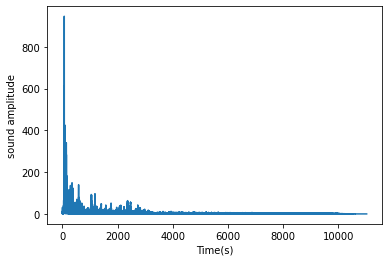

In [224]:
equalizerRange_Window(song_magnitude,song_frequency,slider1_ranges,0)
equalizerRange_Window(song_magnitude,song_frequency,slider2_ranges,0)
song_edited = calc_inv_fourier(new_mag, song_phase)
# plotFourierMag(new_mag)

In [208]:
# audioPlayer(data=y_harmonic, rate=sr, autoplay=True)
# play the edited data
audioPlayer(data=song_edited, rate=sr, autoplay=False)

In [162]:
# for writing the song 
sf.write('after.wav', song_edited, sr)

In [163]:
# extract the percussive component
y_percussive = librosa.effects.percussive(song, margin=5)
y_harmonic = librosa.effects.harmonic(song, margin=5)

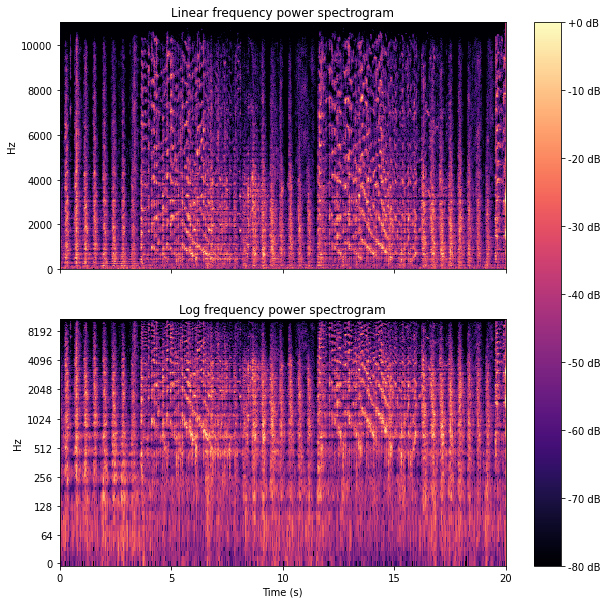

In [164]:
# drawing a spectrogram
d = librosa.stft(y_percussive)
D = librosa.amplitude_to_db(np.abs(d),ref=np.max)
fig,ax = plt.subplots(2,1,sharex=True,figsize=(10,10))
img = dsp.specshow(D, y_axis='linear', x_axis='s',sr=sr,ax=ax[0])
ax[0].set(title='Linear frequency power spectrogram')
ax[0].label_outer()
dsp.specshow(D,y_axis='log',x_axis='s',sr=sr,ax=ax[1])
ax[1].set(title='Log frequency power spectrogram')
ax[1].label_outer()
fig.colorbar(img, ax=ax, format='%+2.f dB')

In [165]:
# Bin separation and operations
# 125 Hz–1KHz freq range for violins
# 260 Hz–3.5KHz for celeste
# slider_ranges= [[[200,1500],[1500,3500]]]

# def equalizer(magnitude,frequency,sliders_value): 
# # iterate on slider values 
#     for itr in sliders_value:
#         #for each slider, iterate on the ranges
#         for comp in slider_ranges:
#             #for each range (which is a list)
#             for rng in comp:
#                 # adjust magnitude of range in list      
#                 target_freq= list(np.where((frequency>rng[0])&(frequency<rng[1]))[0])
#                 for i in target_freq:
#                     song_magnitude[i]=song_magnitude[i]*10**(itr)                
# equalizer(song_magnitude,song_frequency,[0,0,0])

In [166]:
print("you got this")

you got this


In [167]:
# plotting part with plotly, abit slow
# xpoints = np.arange(0, song.size, 1)
# ypoints = song
# trace0 = go.Scatter(
#    x = xpoints, y = ypoints
# )
# data = [trace0]
# plotly.offline.iplot({ "data": data,"layout": go.Layout(title="Sine wave")})